# Ford GoBike Data Analysis

## By Asmer Amen

## Introduction
- This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
- This notebook explores the Ford GoBike's trip data for public containing bike rides from 2018. The attributes included the trip start/end time, as well as additional measurements such as user type, gender, and age.

#### The Data
- Each trip is anonymized and includes:
   - Trip Duration (seconds)
   - Start Time and Date
   - End Time and Date
   - Start Station ID
   - Start Station Name
   - Start Station Latitude
   - Start Station Longitude
   - End Station ID
   - End Station Name
   - End Station Latitude
   - End Station Longitude
   - Bike ID
   - User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import requests
from zipfile import ZipFile
from io import BytesIO

import os

## Data Gathering 

In [3]:
data_folder = 'data'

In [4]:
# gathering data details for 2018

# url = 'https://s3.amazonaws.com/fordgobike-data/2018{}-fordgobike-tripdata.csv.zip'

# for month in range(1,12):
#     month_str = str(month)
#     response = requests.get(url.format(month_str.zfill(2)))
        
#     # code below opens zip file; BytesIO returns a readable and writeable view of the contents;
#     unzipped = ZipFile(BytesIO(response.content))
        
#     # puts extracted zip file into folder trip_data_files
#     unzipped.extractall(data_folder)

In [5]:
data_list = [pd.read_csv(data_folder+'/'+file_name) for file_name in os.listdir(data_folder)]
df = pd.concat(data_list)

## Data Wrangling

In [6]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [7]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.732358e+06,1.720779e+06,1.732358e+06,1.732358e+06,1.720779e+06,1.732358e+06,1.732358e+06,1.732358e+06,1.626651e+06
mean,8.638714e+02,1.187221e+02,3.776686e+01,-1.223491e+02,1.172679e+02,3.776698e+01,-1.223486e+02,2.230304e+03,1.983042e+03
std,2.410764e+03,9.958724e+01,1.056814e-01,1.681671e-01,9.965282e+01,1.055627e-01,1.677678e-01,1.225680e+03,1.043766e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.510000e+02,3.100000e+01,3.777106e+01,-1.224113e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.201000e+03,1.978000e+03
50%,5.570000e+02,8.800000e+01,3.778107e+01,-1.223974e+02,8.700000e+01,3.778127e+01,-1.223971e+02,2.293000e+03,1.985000e+03
75%,8.740000e+02,1.830000e+02,3.779625e+01,-1.222856e+02,1.830000e+02,3.779728e+01,-1.222887e+02,3.255000e+03,1.990000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,4.466000e+03,2.000000e+03


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1732358 entries, 0 to 134134
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
dtypes: float64(7), int64(2), object(7)
memory usage: 224.7+ MB


In [9]:
# Check if duplicates exist
df.duplicated().sum()

0

### Data cleaning

The dataset has some columns that are useless in our data observation:
- start_station_id
- start_station_name
- start_station_latitude
- start_station_longitude
- end_station_id', 'end_station_name
- end_station_latitude
- end_station_longitude
- bike_share_for_all_trip

In [10]:
# Drop unwanted columns.
df = df.drop(['start_station_id', 'start_station_name', 'start_station_latitude', 
              'start_station_longitude', 'end_station_id', 'end_station_name', 
              'end_station_latitude', 'end_station_longitude', 'bike_share_for_all_trip'], 
             axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1732358 entries, 0 to 134134
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   duration_sec       int64  
 1   start_time         object 
 2   end_time           object 
 3   bike_id            int64  
 4   user_type          object 
 5   member_birth_year  float64
 6   member_gender      object 
dtypes: float64(1), int64(2), object(4)
memory usage: 105.7+ MB


Converting the start and end time to datatime format for time series processing.

In [11]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

- Got some records with members with no birth year, and the are only 6.1% of the dataset with total number of 105,707.
- We are removing these records, changing the columns type from float to int, then generate the age of the memebers.

In [12]:
df.member_birth_year.isna().sum()

105707

In [13]:
(df.member_birth_year.isna().sum() / df.member_birth_year.shape[0]) *100

6.101914269452388

In [14]:
df.dropna(axis=0, inplace=True)

In [15]:
df.isna().sum()

duration_sec         0
start_time           0
end_time             0
bike_id              0
user_type            0
member_birth_year    0
member_gender        0
dtype: int64

In [16]:
df['member_birth_year'] = df['member_birth_year'].astype(int)
df['age'] = 2018-df['member_birth_year']

In [17]:
df.head(5)

,duration_sec,start_time,end_time,bike_id,user_type,member_birth_year,member_gender,age
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,2765,Subscriber,1986,Male,32
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,3039,Customer,1996,Male,22
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,617,Subscriber,1991,Male,27
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,3571,Subscriber,1988,Male,30
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,1403,Subscriber,1980,Male,38


In [18]:
df.describe()

,duration_sec,bike_id,member_birth_year,age
count,1.626651e+06,1.626651e+06,1.626651e+06,1.626651e+06
mean,7.811039e+02,2.236423e+03,1.983042e+03,3.495837e+01
std,2.015300e+03,1.228977e+03,1.043766e+01,1.043766e+01
min,6.100000e+01,1.100000e+01,1.881000e+03,1.800000e+01
25%,3.450000e+02,1.202000e+03,1.978000e+03,2.800000e+01
50%,5.440000e+02,2.300000e+03,1.985000e+03,3.300000e+01
75%,8.420000e+02,3.266000e+03,1.990000e+03,4.000000e+01
max,8.628100e+04,4.466000e+03,2.000000e+03,1.370000e+02


### What is the structure of your dataset?
    It contains 8 columns and 1732358  rows.
### What is/are the main feature(s) of interest in your dataset?
    it contains start and end points also the gender, age and ride duration for 2018.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
    the start datetime,gender and member birth year.



## Exploratory Data Analysis

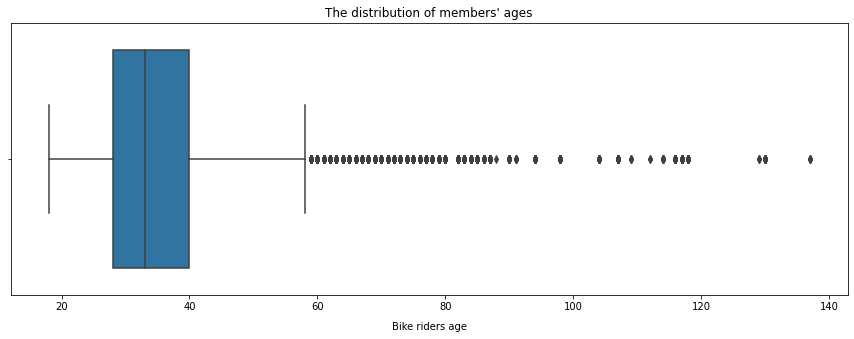

In [19]:
plt.figure(figsize=(15,5))
sb.boxplot( data=df, x='age',)
plt.title("The distribution of members' ages",y=1)
plt.xlabel("Bike riders age", labelpad=10);

Here we can see that about 95% of the members in age under 60 years old, and we got wrong ages like members over 100 years old which means some members entered misleading data. So we remove other ages.

In [20]:
df = df[df['age']<=60]

In [21]:
df.describe()

,duration_sec,bike_id,member_birth_year,age
count,1.592417e+06,1.592417e+06,1.592417e+06,1.592417e+06
mean,7.805880e+02,2.238083e+03,1.983743e+03,3.425732e+01
std,2.017668e+03,1.229580e+03,9.256390e+00,9.256390e+00
min,6.100000e+01,1.100000e+01,1.958000e+03,1.800000e+01
25%,3.450000e+02,1.204000e+03,1.978000e+03,2.700000e+01
50%,5.440000e+02,2.302000e+03,1.986000e+03,3.200000e+01
75%,8.410000e+02,3.271000e+03,1.991000e+03,4.000000e+01
max,8.628100e+04,4.466000e+03,2.000000e+03,6.000000e+01


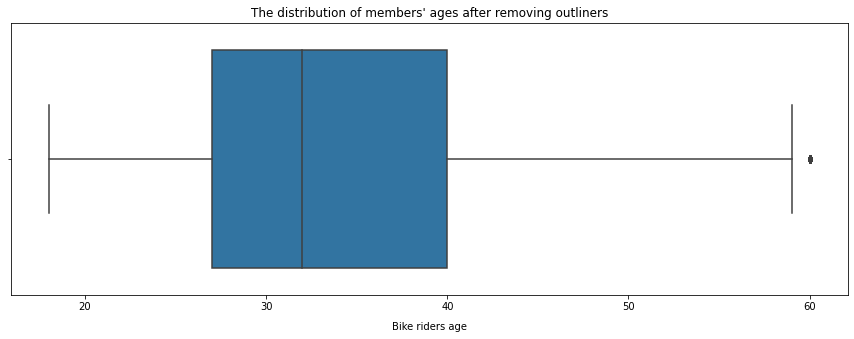

In [22]:
plt.figure(figsize=(15,5))
sb.boxplot( data=df, x='age',)
plt.title("The distribution of members' ages after removing outliners",y=1)
plt.xlabel("Bike riders age", labelpad=10);

Seperate dates and times

In [23]:
df['start_time_date'] = df['start_time'].dt.date
df['end_time_date'] = df['end_time'].dt.date

In [24]:
df['start_time_month'] = df['start_time'].dt.month.astype(int)
df['end_time_month'] = df['end_time'].dt.month.astype(int)

In [25]:
df.head()

,duration_sec,start_time,end_time,bike_id,user_type,member_birth_year,member_gender,age,start_time_date,end_time_date,start_time_month,end_time_month
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,2765,Subscriber,1986,Male,32,2018-01-31,2018-02-01,1,2
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,3039,Customer,1996,Male,22,2018-01-31,2018-02-01,1,2
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,617,Subscriber,1991,Male,27,2018-01-31,2018-02-01,1,2
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,3571,Subscriber,1988,Male,30,2018-01-31,2018-02-01,1,2
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,1403,Subscriber,1980,Male,38,2018-01-31,2018-01-31,1,1


In [26]:
df['start_time_hour'] = df['start_time'].dt.hour
df['end_time_hour'] = df['end_time'].dt.hour

In [27]:
df['start_time_hour_minute'] = df['start_time'].map(lambda x: x.strftime('%H-%m'))
df['end_time_hour_minute'] = df['end_time'].map(lambda x: x.strftime('%H-%m'))

In [28]:
import calendar

In [29]:
df['start_time_weekday'] = df['start_time'].dt.weekday
df['end_time_weekday'] = df['end_time'].dt.weekday
df['start_time_weekday_abbr'] = df['start_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])
df['end_time_weekday_abbr'] = df['end_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])

In [30]:
df.head()

,duration_sec,start_time,end_time,bike_id,user_type,member_birth_year,member_gender,age,start_time_date,end_time_date,start_time_month,end_time_month,start_time_hour,end_time_hour,start_time_hour_minute,end_time_hour_minute,start_time_weekday,end_time_weekday,start_time_weekday_abbr,end_time_weekday_abbr
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,2765,Subscriber,1986,Male,32,2018-01-31,2018-02-01,1,2,22,19,22-01,19-02,2,3,Wed,Thu
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,3039,Customer,1996,Male,22,2018-01-31,2018-02-01,1,2,14,10,14-01,10-02,2,3,Wed,Thu
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,617,Subscriber,1991,Male,27,2018-01-31,2018-02-01,1,2,19,6,19-01,06-02,2,3,Wed,Thu
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,3571,Subscriber,1988,Male,30,2018-01-31,2018-02-01,1,2,23,0,23-01,00-02,2,3,Wed,Thu
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,1403,Subscriber,1980,Male,38,2018-01-31,2018-01-31,1,1,23,23,23-01,23-01,2,2,Wed,Wed


In [31]:
# For readability
df['duration_min'] = df['duration_sec']/60

### Monthly Trend
Observing the total number of rides each month over 2018.

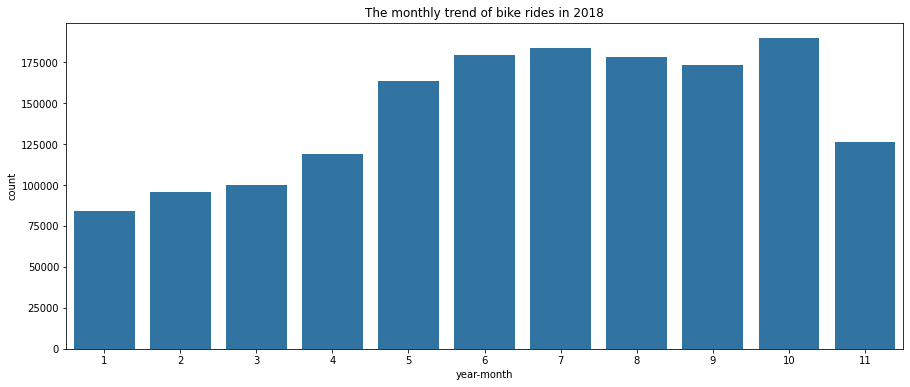

In [32]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(15,6))
sb.countplot(data=df.sort_values(by='start_time_month'), x='start_time_month', color=base_color)
plt.title('The monthly trend of bike rides in 2018',)
plt.xlabel('year-month',)
plt.ylabel('count',);

#### We see the top month is October followed by July.
#### Also see the top months, are in Summer and the first half of Fall. This may indicate it's better weather for bikers.

### Genders

In [33]:
gender_df = df.groupby('member_gender').agg({'bike_id':'count'})
gender_df.rename(columns={'bike_id':'count'}, inplace=True)
gender_df.head()

,count
member_gender,
Female,402727
Male,1165212
Other,24478


In [34]:
gender_df['percent'] = (gender_df['count'] /gender_df['count'].sum()) *100
gender_df.head()

,count,percent
member_gender,,
Female,402727,25.290298
Male,1165212,73.172542
Other,24478,1.537160


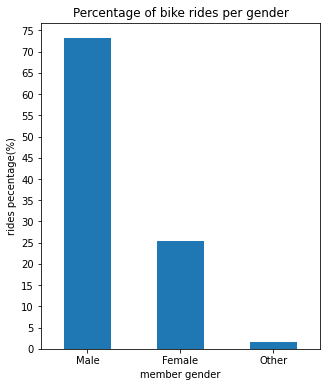

In [35]:
gender_df['percent'].sort_values(ascending=False).plot(kind='bar', figsize=(5,6))
plt.title('Percentage of bike rides per gender',)
plt.xlabel('member gender',)
plt.ylabel('rides pecentage(%)',)
plt.xticks(rotation=360)
plt.yticks([x for x in range(0,80,5)]);

#### We see the male riders are almost 3 times the number of the female riders.

### Weekdays Vs. Weekends

In [36]:
weekday_df = df.groupby('start_time_weekday_abbr').agg({'bike_id':'count'})
weekday_df.rename(columns={'bike_id':'count'}, inplace=True)
weekday_df

,count
start_time_weekday_abbr,
Fri,250307
Mon,253611
Sat,138382
Sun,122675
Thu,272262
Tue,279194
Wed,275986


In [37]:
weekday_df['percent'] = (weekday_df['count']/weekday_df['count'].sum())*100
# weekday_df

In [38]:
weekday_index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_df = weekday_df.reindex(weekday_index)
# weekday_df

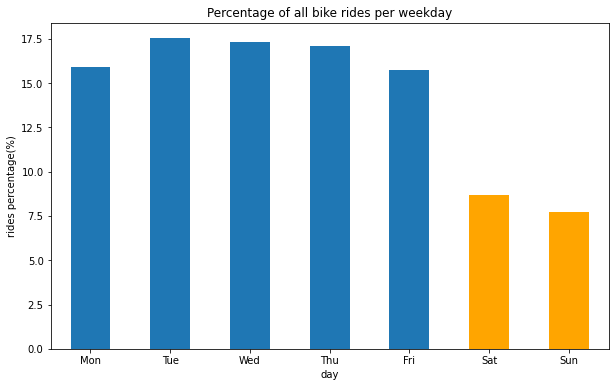

In [39]:
days_colors = [base_color for _ in range(5)] + ['orange', 'orange']

weekday_df['percent'].plot(kind='bar', color=days_colors, figsize=(10,6))

plt.title('Percentage of all bike rides per weekday',)
plt.xlabel('day',)
plt.ylabel('rides percentage(%)',)
plt.xticks(rotation=360);

#### We see the bike rides of weekdays are twice the rides of the weekends.

In [40]:
def age_bins(x):
    if 10<=x<20:
        return '10 - 20'
    elif 20<=x<30:
        return '20 - 30'
    elif 30<=x<40:
        return '30 - 40'
    elif 40<=x<50:
        return '40 - 50'
    elif 50<=x<=60:
        return '50 - 60'
    else:
        return x
df['member_age_bins'] = df['age'].apply(age_bins)

### Age ranges

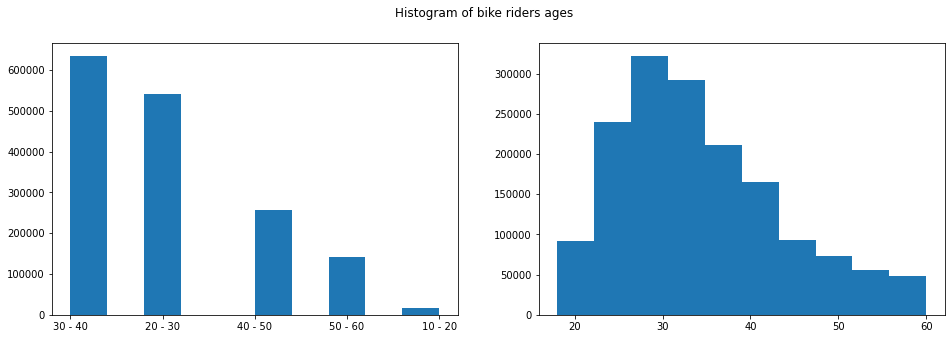

In [41]:
fig,(ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
df['member_age_bins'].hist(grid=False, ax=ax1,)
df['age'].hist(grid=False, ax=ax2)
fig.suptitle('Histogram of bike riders ages');

#### We see the age range with most number of bike riders is 30-40. 
#### And the histogram is skawed right, with the number of riders increasing untill the 30-40 range then decreasing again, with the lowest number of bike riders of age rage 10-20.

### Subscribers Vs Customers

In [42]:
df.user_type.value_counts() / df.shape[0]

Subscriber    0.883091
Customer      0.116909
Name: user_type, dtype: float64

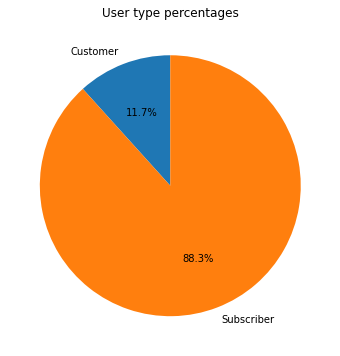

In [43]:
# sb.countplot(data=df, x='user_type')
plt.figure(figsize=(6, 6))
df.groupby('user_type').size().plot(kind='pie', x='user_type', y=0, startangle=90, autopct='%1.1f%%', legend=False)
plt.title('User type percentages')
plt.ylabel(None);

- Percentage of subscribers is almost %88.3.
- Percentage of customers is almost %11.7.

In [44]:
user_type_df = df.groupby(['start_time_month', 'user_type']).size().reset_index()
# user_type_df.head()

In [45]:
user_type_df.rename(columns={0: 'count'}, inplace=True)
# user_type_df.head()

### Subscribers Vs Customers Bike rides count

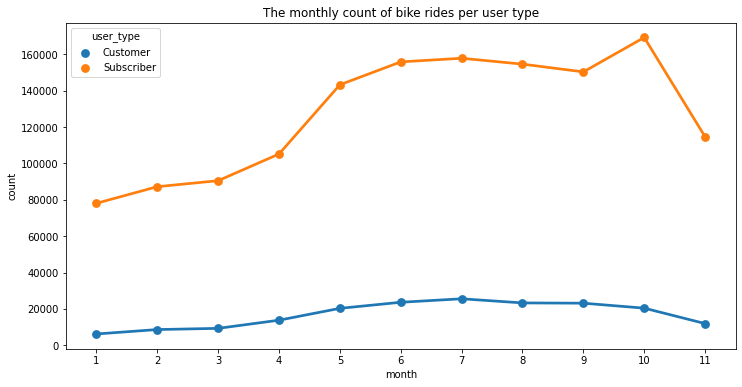

In [46]:
plt.figure(figsize=(12, 6))
sb.pointplot(data=user_type_df, x='start_time_month', y='count', hue='user_type',)
plt.title('The monthly count of bike rides per user type')
plt.ylabel('count')
plt.xlabel('month');

- Wee see ride trips increase over the months of spring, summer and fall, which indicate people prefer to go for bike rides in this weather rather than winter.

### Subscribers Vs Customers trip duration

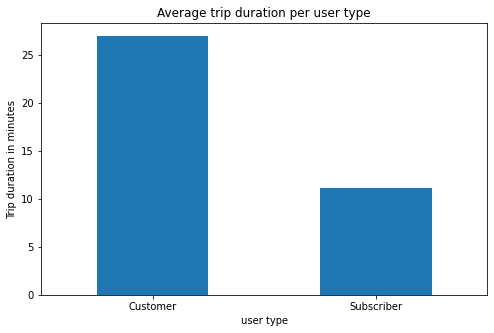

In [47]:
df.groupby('user_type')['duration_min'].mean().plot(kind='bar', figsize=(8,5))
plt.title('Average trip duration per user type')
plt.ylabel('Trip duration in minutes')
plt.xlabel('user type')
plt.xticks(rotation=360);

We see that customer have less number of rides compared to subcriber users. However, the customer users have bigger trip duration compared to subscriber users.

### Member gender Vs. Trip time duration

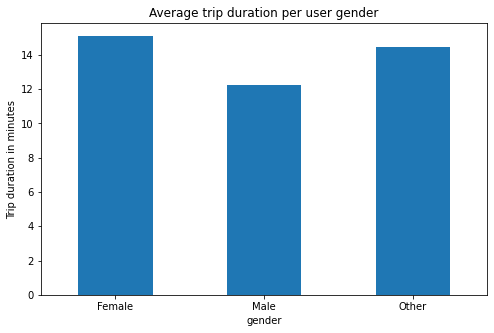

In [48]:
df.groupby('member_gender')['duration_min'].mean().plot(kind='bar', figsize=(8,5))
plt.title('Average trip duration per user gender')
plt.ylabel('Trip duration in minutes')
plt.xlabel('gender')
plt.xticks(rotation=360);

We see female biker rider have the most time duration, and male biker rider has the least. However, the duration doesn't vary much as female mean duration is ~15 min. and male mean duration is ~12 min.

### Age Vs Trip time duration

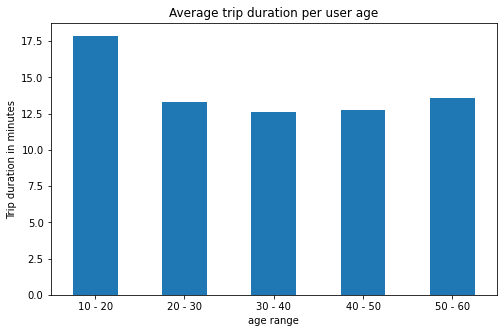

In [49]:
df.groupby('member_age_bins')['duration_min'].mean().plot(kind='bar', figsize=(8,5))
plt.title('Average trip duration per user age')
plt.ylabel('Trip duration in minutes')
plt.xlabel('age range')
plt.xticks(rotation=360);

- We can see the younger age range 10-20 has the most duration time. However, we find the next age range is 50-60 which is surprising.
- Another point, the age range with most rides 30-40 has the lowest duration time of around 13 min.

### Start hour Vs. Time duration

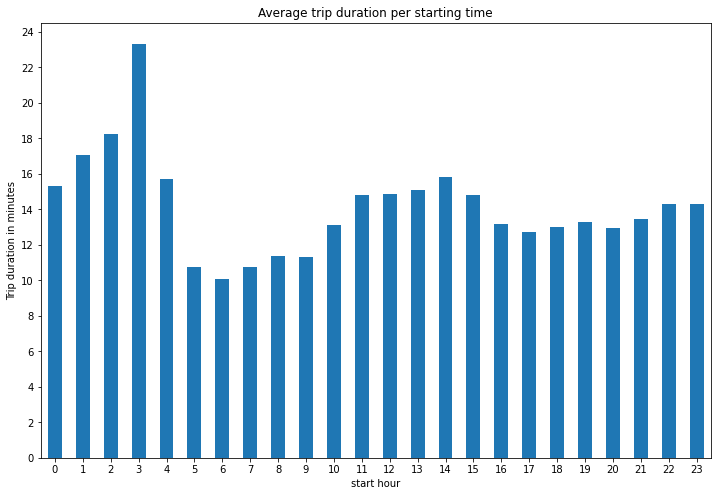

In [50]:
df.groupby('start_time_hour')['duration_min'].mean().plot(kind='bar', figsize=(12,8))
plt.title('Average trip duration per starting time')
plt.ylabel('Trip duration in minutes')
plt.xlabel('start hour')
plt.yticks([x for x in range(0,25, 2)])
plt.xticks(rotation=360);

We see the trips with most duration time are those started the first 3 hours after midnight, especially 3 am, followed by 2 pm. And the least are those early in the morning forn 5-9 am.

### Trip rides Vs. user type over weekdays

In [51]:
weekday_user_type_df = df.groupby(['start_time_weekday_abbr', 'user_type']).agg({'bike_id':'count'})
weekday_user_type_df.rename(columns={'bike_id':'count'}, inplace=True)
weekday_user_type_df['percent'] = (weekday_user_type_df['count']/weekday_user_type_df['count'].sum())*100
# weekday_user_type_df

In [52]:
weekday_user_type_df.reset_index(inplace=True)
# weekday_user_type_df

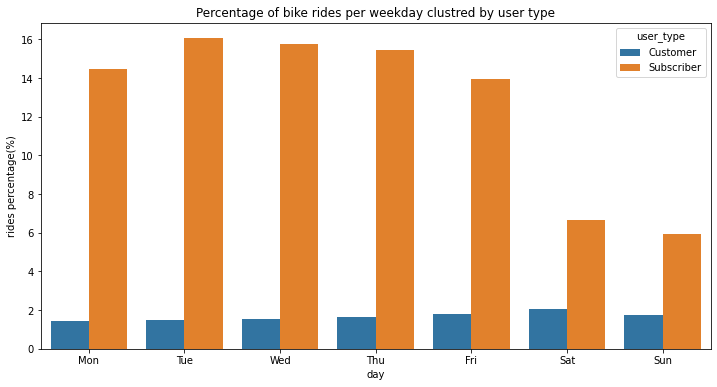

In [53]:
plt.figure(figsize=(12,6))
sb.barplot(data=weekday_user_type_df, x='start_time_weekday_abbr', y='percent', hue='user_type', order=weekday_index
          )
plt.title('Percentage of bike rides per weekday clustred by user type',)
plt.xlabel('day',)
plt.ylabel('rides percentage(%)',)
plt.xticks(rotation=360);

- We see that the customers percentage of rides across the weekdays doesn't change much, it's in the range 1.4%~2%. However, the subscriber users percntage changes, and drops on the weekend as observed in the all biker rides per weekday graph earlier which means that the subscriber users rides define the trend here.

### Trip rides Vs. user gender over weekdays

In [54]:
weekday_gender_df = df.groupby(['start_time_weekday_abbr', 'member_gender']).agg({'bike_id':'count'})
weekday_gender_df.rename(columns={'bike_id':'count'}, inplace=True)
weekday_gender_df['percent'] = (weekday_gender_df['count']/weekday_gender_df['count'].sum())*100
# weekday_gender_df

In [55]:
weekday_gender_df.reset_index(inplace=True)
# weekday_gender_df

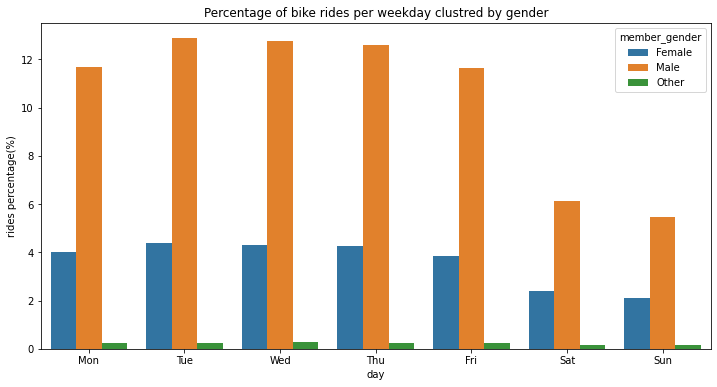

In [56]:
plt.figure(figsize=(12,6))
sb.barplot(data=weekday_gender_df, x='start_time_weekday_abbr', y='percent', hue='member_gender', order=weekday_index
          )
plt.title('Percentage of bike rides per weekday clustred by gender',)
plt.xlabel('day',)
plt.ylabel('rides percentage(%)',)
plt.xticks(rotation=360);

We see the member gender doesn't affect the percentage of trips per weekdays.

### Trip rides Vs. user age over weekdays

In [57]:
weekday_age_df = df.groupby(['start_time_weekday_abbr', 'member_age_bins']).agg({'bike_id':'count'})
weekday_age_df.rename(columns={'bike_id':'count'}, inplace=True)
weekday_age_df['percent'] = (weekday_age_df['count']/weekday_age_df['count'].sum())*100
weekday_age_df.reset_index(inplace=True)
# weekday_age_df

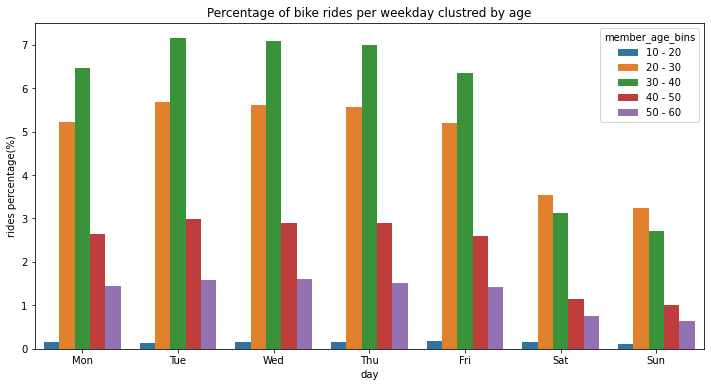

In [58]:
plt.figure(figsize=(12,6))
sb.barplot(data=weekday_age_df, x='start_time_weekday_abbr', y='percent', hue='member_age_bins', order=weekday_index
          )
plt.title('Percentage of bike rides per weekday clustred by age',)
plt.xlabel('day',)
plt.ylabel('rides percentage(%)',)
plt.xticks(rotation=360);

We see the member age range doesn't affect the percentage of trips per weekdays.

### Trip rides Vs. user gender over age ranges

In [59]:
gender_age_df = df.groupby(['member_gender', 'member_age_bins']).agg({'bike_id':'count'})
gender_age_df.rename(columns={'bike_id':'count'}, inplace=True)
gender_age_df['percent'] = (gender_age_df['count']/gender_age_df['count'].sum())*100
gender_age_df.reset_index(inplace=True)
# gender_age_df

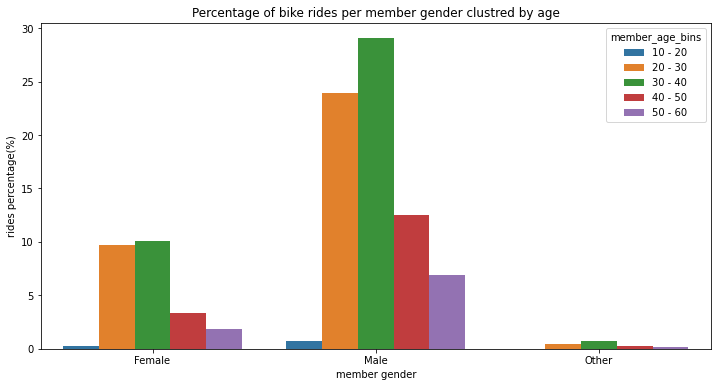

In [60]:
plt.figure(figsize=(12,6))
sb.barplot(data=gender_age_df, x='member_gender', y='percent', hue='member_age_bins')
plt.title('Percentage of bike rides per member gender clustred by age',)
plt.xlabel('member gender',)
plt.ylabel('rides percentage(%)',)
plt.xticks(rotation=360);

- We see the most rides are by male members of age range 30-40.
- Most of female members riders are in range 20-40 years.

### Trips Vs user type and gender

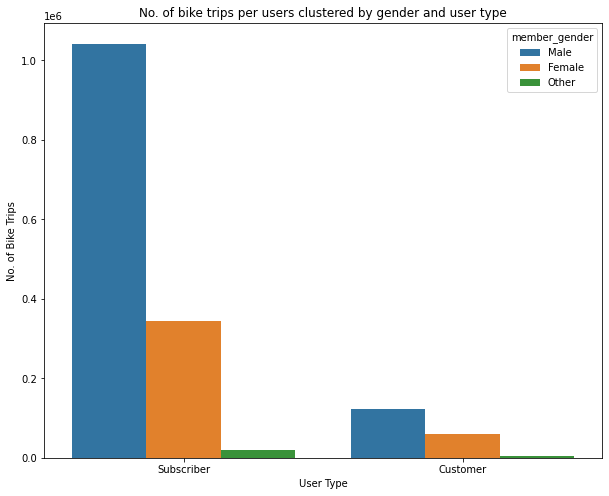

In [61]:
plt.figure(figsize = (10, 8))
g = sb.countplot(data=df, x="user_type", hue="member_gender", order=df.user_type.value_counts().index)
g.set_title('No. of bike trips per users clustered by gender and user type')
g.set_xlabel('User Type')
g.set_ylabel('No. of Bike Trips');

We see male subscriber user significantly the most number of rides.

### Duration time Vs gender and age

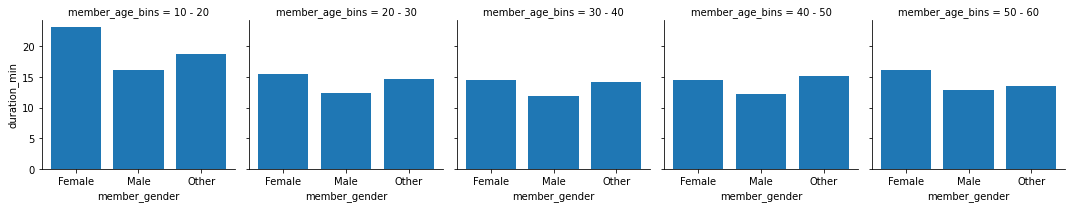

In [62]:
gender_age_time_df = df.groupby(['member_gender', 'member_age_bins']).agg({'duration_min':'mean'})
gender_age_time_df.reset_index(inplace=True)
g = sb.FacetGrid(data = gender_age_time_df, col = 'member_age_bins',)
g.map(plt.bar, 'member_gender', 'duration_min')
g.add_legend();

- We see females in all age ranges have the best average duration time, except for 40-50 age range. 
- Females in 10-20 age range have the best average duration time.
- Males have the least time duration in all ranges.
- Others have the best time duration only in 40-50 age range.

### No of trips Vs day and hour

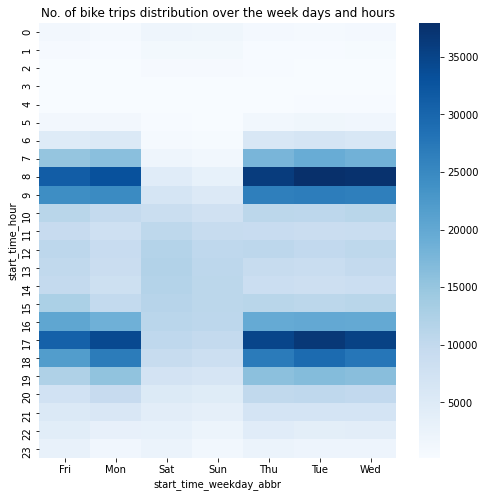

In [63]:
day_hour_df = df.groupby(['start_time_hour', 'start_time_weekday_abbr']).agg({'bike_id':'count'})
day_hour_df.rename(columns={'bike_id':'count'}, inplace=True)
day_hour_df.reset_index(level='start_time_hour', inplace=True)

pivot = day_hour_df.pivot_table(index='start_time_hour', columns='start_time_weekday_abbr', values='count')
plt.figure(figsize=(8,8))
sb.heatmap(data=pivot, cmap='Blues')
plt.title('No. of bike trips distribution over the week days and hours');

- We see the hours around midnight have the least ride trips, specially the first 4 hours after midnight and the 2 hours before midnight.
- For weekends we see small number of ride trips almost all day compared to week days, with the highest number around midnight and most afternoon.
- For week days we see the bike rides increase, 2 times through the days for almost 3 hours each time, first in the morning starting 7 am, and second afternoon till sunset starting 4 pm. This may indicate that members use their bike as transportation to and from their work.

### No of trips Vs hour and gender

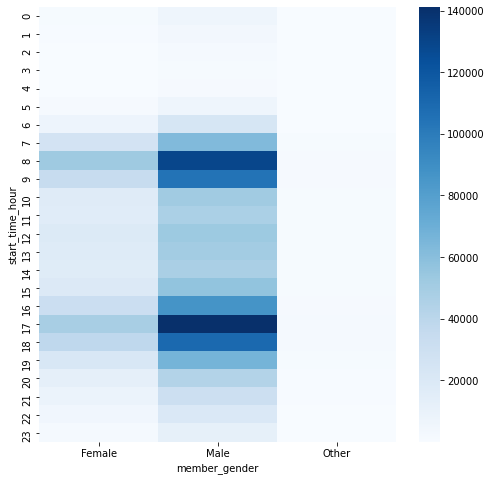

In [64]:
day_hour_df = df.groupby(['start_time_hour', 'member_gender']).agg({'bike_id':'count'})
day_hour_df.rename(columns={'bike_id':'count'}, inplace=True)
day_hour_df.reset_index(level='start_time_hour', inplace=True)

pivot = day_hour_df.pivot_table(index='start_time_hour', columns='member_gender', values='count')
plt.figure(figsize=(8,8))
sb.heatmap(data=pivot, cmap='Blues');

- We see male memebers significantly prefer day time to night time rides, and this causes the hours distribution we saw in the last heatmap since female and other genders trips count doesn't vary much.

## Conclusion
1. Members tend to go for rdie trip on spring, summer and fall more than winter. and on week days rather than week ends, spceially on the time to commute to and from work.
2. Most of the members are males.
3. Members with age range of 30-40 have the most records to use bikes, specially for males. However, their trip duration avrage is less than women.
4. Trip duration average varies for age ranges, where the best is 10-20 then 20-30 and 50-60.
5. Since number of subscriber user is almost 8 times customer user, they define the trend when it comes to total count of rides over the year months. However cutomer user have bigger trip duration.